In [1]:
# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
print(train.shape)

(550068, 12)


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# missing values
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
# percentage of missing value

train.isnull().sum()*100/len(train)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [9]:
# drop unnecessary column
train.drop(['User_ID','Product_ID','Product_Category_3'] , axis = 1 , inplace = True)    # Product_Category_3 has approx 70% missing 

# Filling missing Values

In [10]:
train['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [11]:
train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
# Filling missing value with median
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].median())

In [13]:
train.describe(include = 'all')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,2,7,NaN,3,5,NaN,NaN,NaN,NaN
top,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN
freq,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.576434,9263.968713
std,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,4.226025,5023.065394
min,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,12.000000
25%,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,8.000000,5823.000000
50%,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,8047.000000
75%,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,12054.000000


# Convert categorical column into numerical

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


In [15]:
print(train['Gender'].value_counts())
print(train['Age'].value_counts())
print(train['City_Category'].value_counts())
print(train['Stay_In_Current_City_Years'].value_counts())

M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [16]:
train['Gender'] = train['Gender'].map({'M':0,'F':1})
train['Age'] = train['Age'].map({'0-17':0 , '18-25':1 , '26-35':2 , '36-45':3 , '46-50':4 ,'51-55':5 , '55+':6})
train['City_Category'] = train['City_Category'].map({'A':0,'B':1,'C':2})
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2 , '3':3 , '4+':4})

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 37.8 MB


<AxesSubplot:>

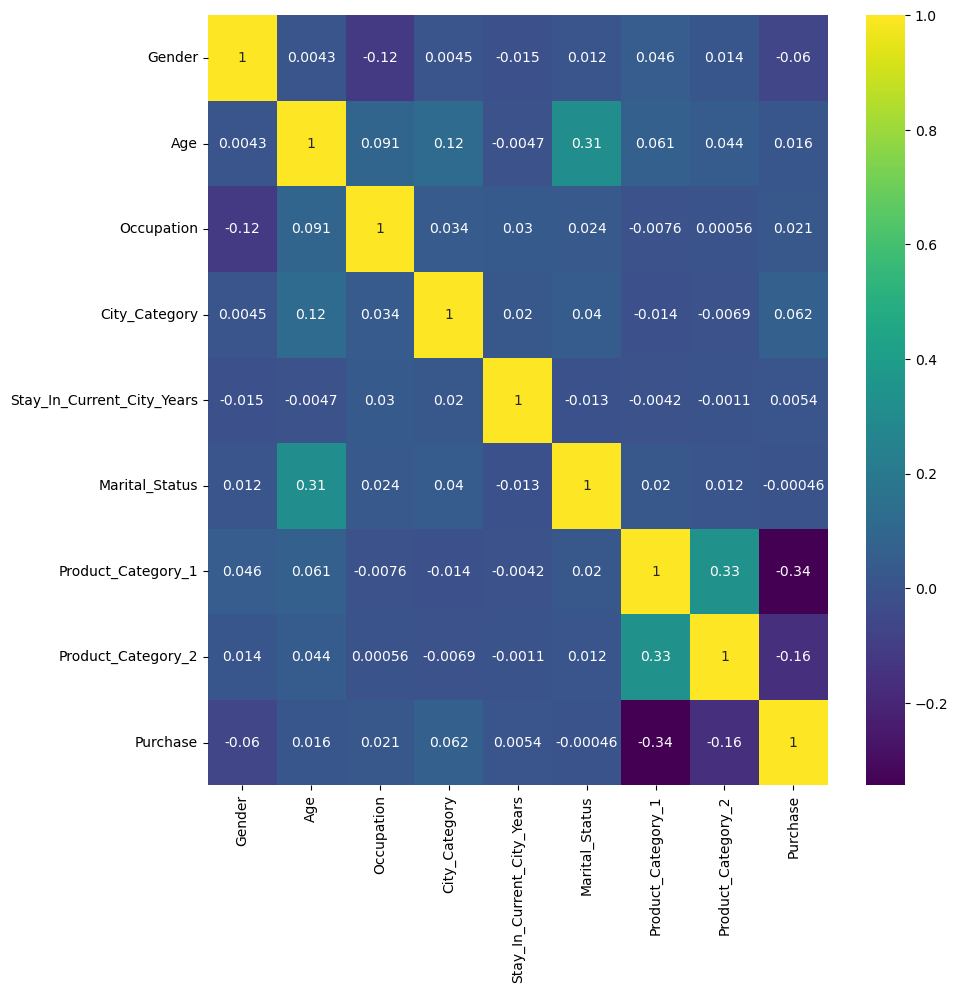

In [18]:
# Checking corelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train.corr() , annot= True , cmap = 'viridis')

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = train.drop(['Purchase'], axis = 1 )
y = train['Purchase']


print(X.shape)
print(y.shape)

(550068, 8)
(550068,)


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# ML Algorithm

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [23]:
lr = LinearRegression(n_jobs= -1)
knr = KNeighborsRegressor(n_jobs= -1)
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor(n_jobs= -1)
xgb = XGBRFRegressor(n_jobs= -1)

In [24]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [26]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [27]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [29]:
xgb.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [30]:
y_pred1 = lr.predict(X_test)

In [31]:
y_pred2 = knr.predict(X_test)

In [32]:
y_pred3 = dtr.predict(X_test)

In [33]:
y_pred4 = rf.predict(X_test)

In [34]:
y_pred5 = xgb.predict(X_test)

# Metric

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
RMSE1 = np.sqrt(mean_squared_error(y_test,y_pred1))
RMSE1

4689.497699521037

In [37]:
RMSE2 = np.sqrt(mean_squared_error(y_test,y_pred2))
RMSE2

3234.4131142360516

In [38]:
RMSE3 = np.sqrt(mean_squared_error(y_test,y_pred3))
RMSE3

3168.998327512168

In [39]:
RMSE4 = np.sqrt(mean_squared_error(y_test,y_pred4))
RMSE4

3020.862386001619

In [40]:
RMSE5 = np.sqrt(mean_squared_error(y_test,y_pred5))
RMSE5

3277.703888350434

### In the above 5 model with base parameter Random Forest give best result. for better accuracy use hyperparameter tunning.